BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

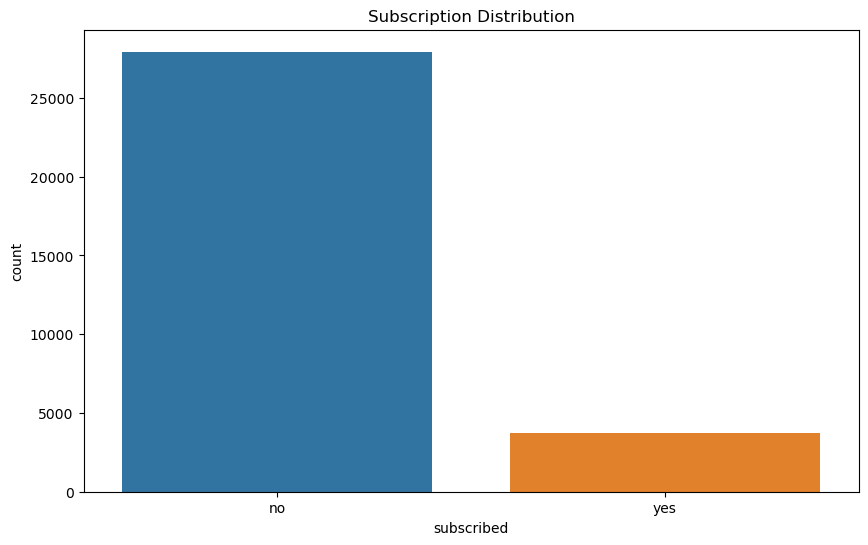

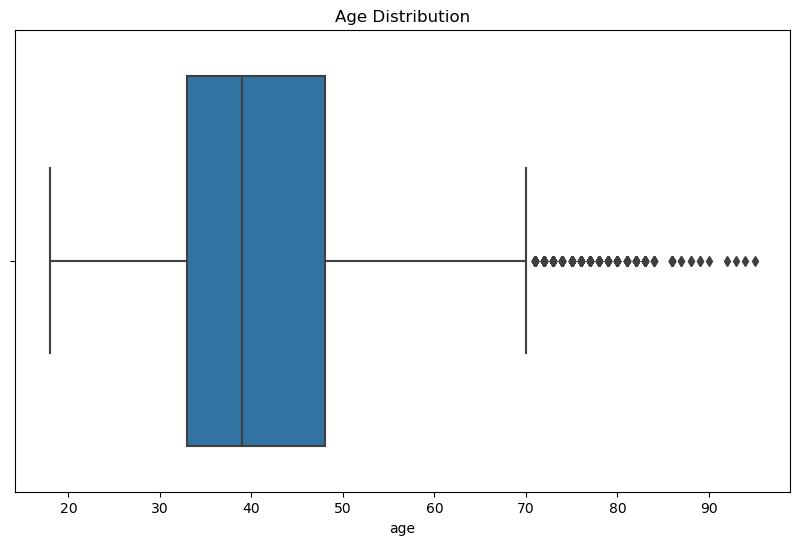

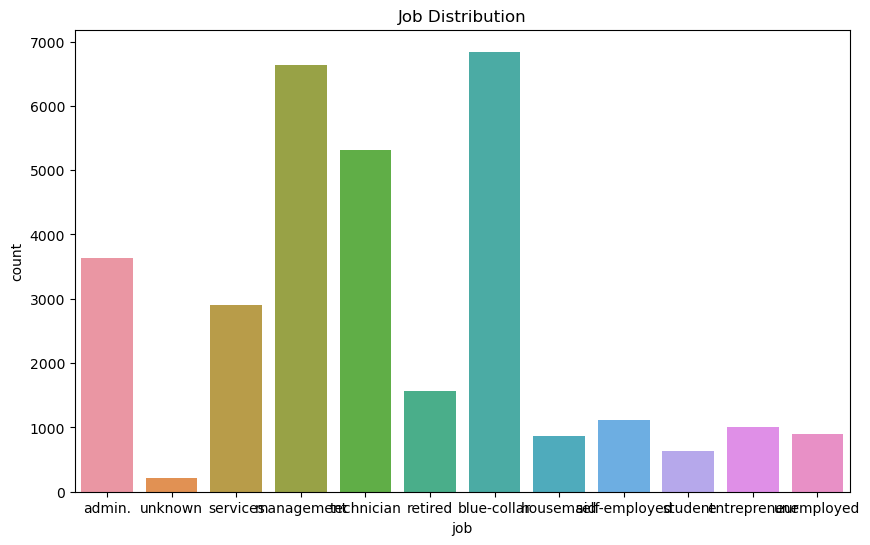

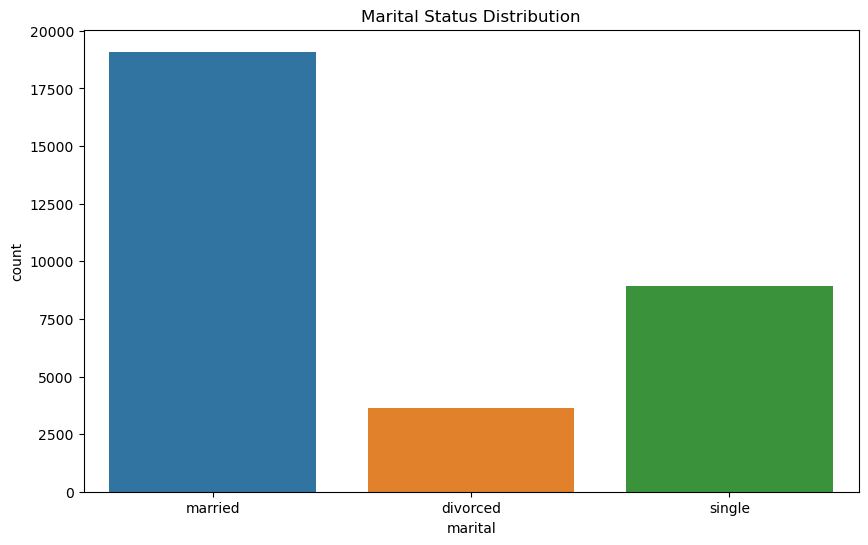

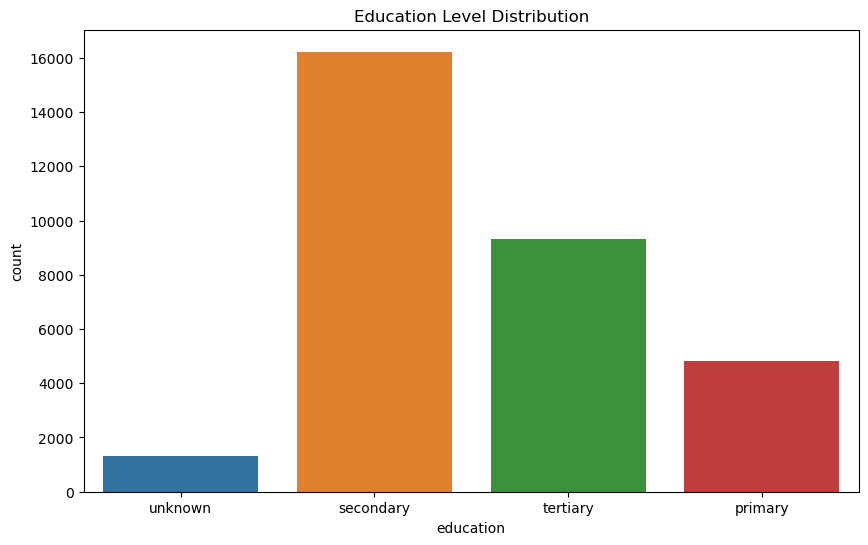

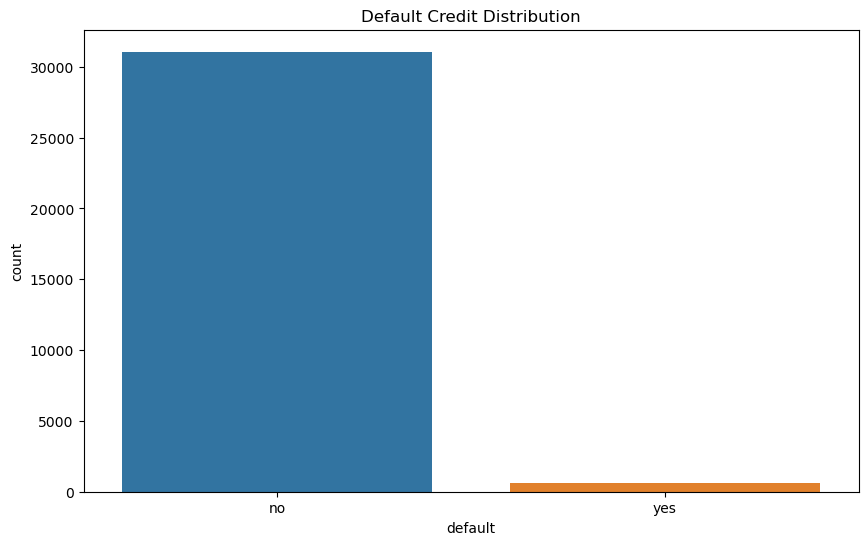

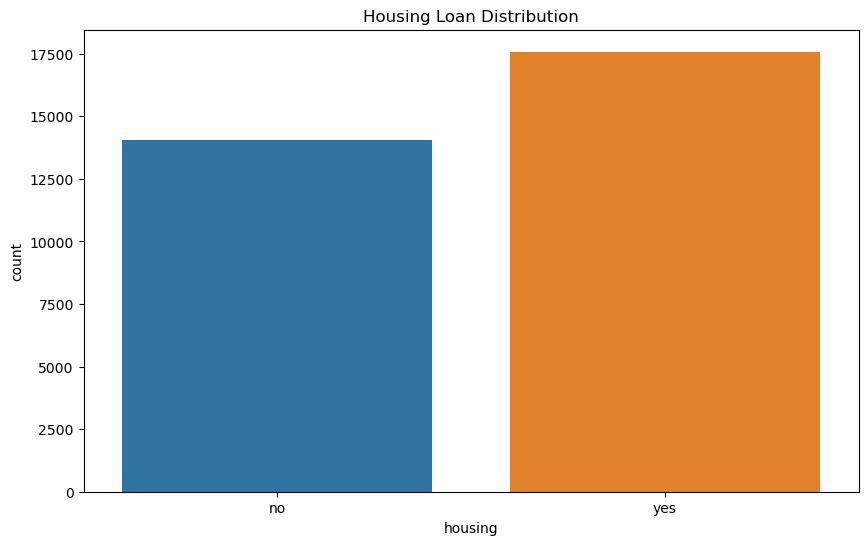

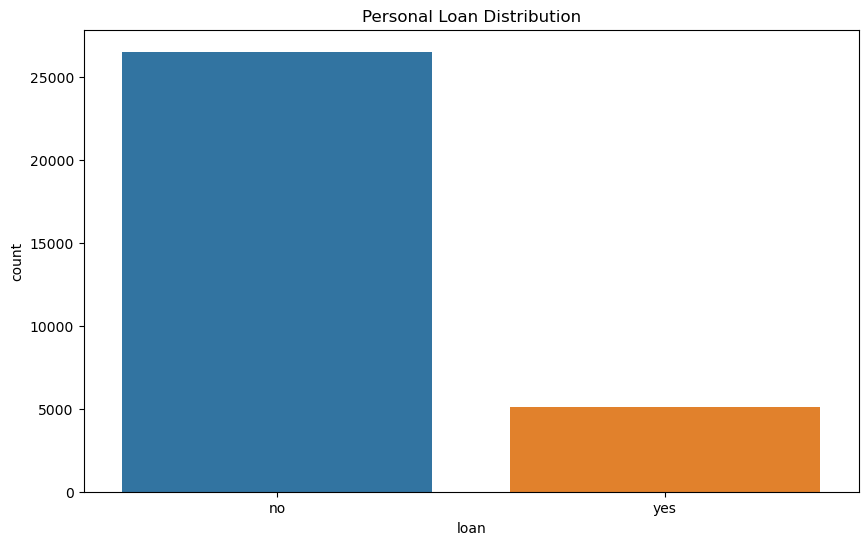

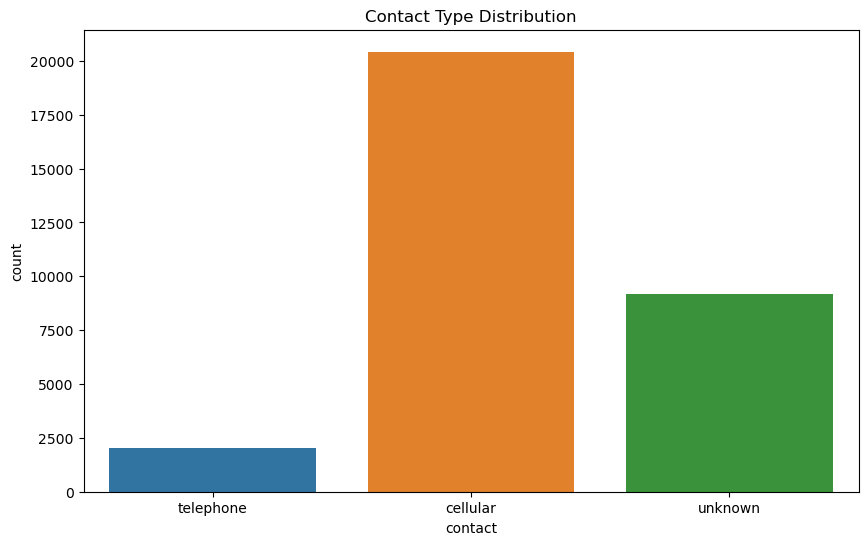

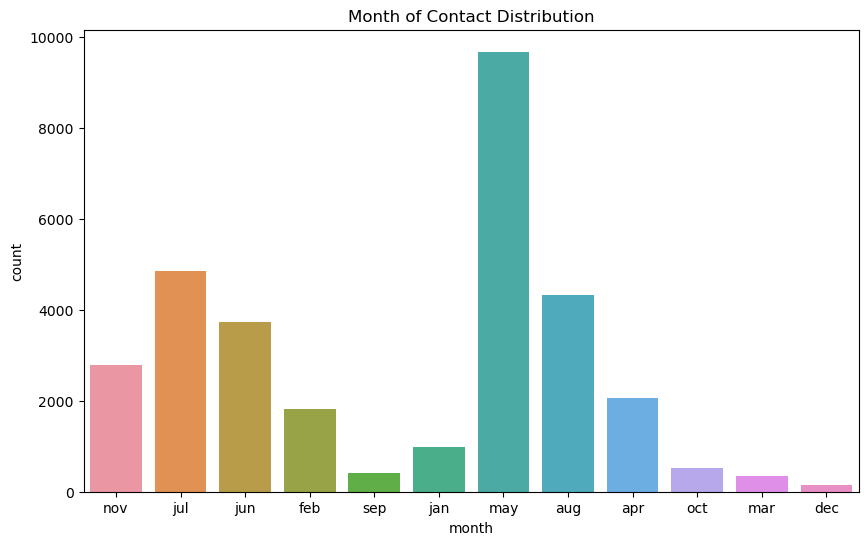

ValueError: Could not interpret input 'day_of_week'

<Figure size 1000x600 with 0 Axes>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


train_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

print(train_df.head())
print(train_df.info())
print(train_df.describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='subscribed', data=train_df)
plt.title('Subscription Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='age', data=train_df)
plt.title('Age Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=train_df)
plt.title('Job Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='marital', data=train_df)
plt.title('Marital Status Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=train_df)
plt.title('Education Level Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='default', data=train_df)
plt.title('Default Credit Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=train_df)
plt.title('Housing Loan Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='loan', data=train_df)
plt.title('Personal Loan Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='contact', data=train_df)
plt.title('Contact Type Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=train_df)
plt.title('Month of Contact Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=train_df)
plt.title('Day of Week of Contact Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=train_df)
plt.title('Contact Duration Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign', data=train_df)
plt.title('Campaign Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='pdays', data=train_df)
plt.title('Pdays Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='previous', data=train_df)
plt.title('Previous Contacts Distribution')
plt.show()


corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()






In [12]:
train_df = pd.read_csv('termdeposit_train.csv')
test_df = pd.read_csv('termdeposit_test.csv')


train_df['job'] = train_df['job'].map({'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11})
train_df['marital'] = train_df['marital'].map({'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3})
train_df['education'] = train_df['education'].map({'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7})
train_df['default'] = train_df['default'].map({'no': 0, 'yes': 1})
train_df['housing'] = train_df['housing'].map({'no': 0, 'yes': 1})
train_df['loan'] = train_df['loan'].map({'no': 0, 'yes': 1})
train_df['contact'] = train_df['contact'].map({'cellular': 0, 'telephone': 1})
train_df['month'] = train_df['month'].map({'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11})
train_df['day'] = train_df['day_of_week'].map({'friday': 0, 'monday': 1, 'thursday': 2, 'tuesday': 3, 'wednesday': 4})

test_df['job'] = test_df['job'].map({'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11})
test_df['marital'] = test_df['marital'].map({'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3})
test_df['education'] = test_df['education'].map({'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7})
test_df['default'] = test_df['default'].map({'no': 0, 'yes': 1})
test_df['housing'] = test_df['housing'].map({'no': 0, 'yes': 1})
test_df['loan'] = test_df['loan'].map({'no': 0, 'yes': 1})
test_df['contact'] = test_df['contact'].map({'cellular': 0, 'telephone': 1})
test_df['month'] = test_df['month'].map({'apr': 0, 'aug': 1})

KeyError: 'day_of_week'

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('Data_Train.csv')


plt.figure(figsize=(10, 6))
sns.boxplot(x='COST', data=train_df)
plt.title('Cost Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='RATING', data=train_df)
plt.title('Rating Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='VOTES', data=train_df)
plt.title('Votes Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='CITY', data=train_df)
plt.title('City Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='LOCALITY', data=train_df)
plt.title('Locality Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='CUISINES', data=train_df)
plt.title('Cuisines Distribution')
plt.show()


corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 16-17: invalid continuation byte

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.




               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       

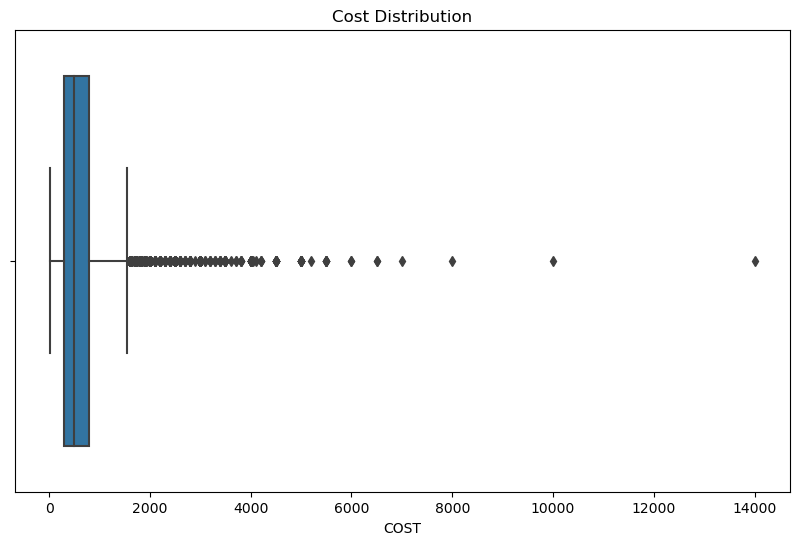

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1000x600 with 0 Axes>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


train_df = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true')


print(train_df.head())
print(train_df.info())
print(train_df.describe())


plt.figure(figsize=(10, 6))
sns.boxplot(x='COST', data=train_df)
plt.title('Cost Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='RATING', data=train_df)
plt.title('Rating Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='VOTES', data=train_df)
plt.title('Votes Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='CITY', data=train_df)
plt.title('City Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='LOCALITY', data=train_df)
plt.title('Locality Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='CUISINES', data=train_df)
plt.title('Cuisines Distribution')
plt.show()


corr_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


X = train_df.drop(['COST'], axis=1)
y = train_df['COST']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


feature_importances = rf_model.feature_importances_
print('Feature Importances:')
for i, feature in enumerate(X.columns):
    print(f'{feature}: {feature_importances[i]:.2f}')